In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/national-stock-exchange-nifty-50-index-values/NIFTY50_stock_spilts.csv
/kaggle/input/national-stock-exchange-nifty-50-index-values/NIFTY50_stock_info.csv
/kaggle/input/national-stock-exchange-nifty-50-index-values/NIFTY50_stock_dividends.csv
/kaggle/input/national-stock-exchange-nifty-50-index-values/NIFTY50_stock_history.csv
/kaggle/input/national-stock-exchange-nifty-50-index-values/NIFTY50_stock_action.csv


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
   
# For time stamps
from datetime import datetime
from math import sqrt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('../input/national-stock-exchange-nifty-50-index-values/NIFTY50_stock_history.csv')

# Inspect the first few rows
print(df.head())

# Check data types
print(df.dtypes)


                        Date         Open         High          Low  \
0  2007-09-17 00:00:00+05:30  4518.450195  4549.049805  4482.850098   
1  2007-09-18 00:00:00+05:30  4494.100098  4551.799805  4481.549805   
2  2007-09-19 00:00:00+05:30  4550.250000  4739.000000  4550.250000   
3  2007-09-20 00:00:00+05:30  4734.850098  4760.850098  4721.149902   
4  2007-09-21 00:00:00+05:30  4752.950195  4855.700195  4733.700195   

         Close  Volume  Dividends  Stock Splits  
0  4494.649902       0        0.0           0.0  
1  4546.200195       0        0.0           0.0  
2  4732.350098       0        0.0           0.0  
3  4747.549805       0        0.0           0.0  
4  4837.549805       0        0.0           0.0  
Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


In [3]:
# Handling missing values
df = df.dropna()  # or df.fillna(method='ffill')

# Correct inconsistencies or errors if any
# Example: df['column_name'] = df['column_name'].replace({'incorrect': 'correct'})


In [4]:
# Descriptive statistics
print(df.describe())

df.drop(['Dividends', 'Stock Splits'], axis=1)


               Open          High           Low         Close        Volume  \
count   3973.000000   3973.000000   3973.000000   3973.000000  3.973000e+03   
mean    9236.021056   9287.436835   9169.590892   9229.877263  1.980294e+05   
std     4508.226979   4517.767767   4490.122988   4505.016225  2.114631e+05   
min     2553.600098   2585.300049   2252.750000   2524.199951  0.000000e+00   
25%     5499.399902   5544.500000   5460.350098   5505.899902  0.000000e+00   
50%     8202.650391   8242.400391   8148.600098   8201.049805  1.686000e+05   
75%    11423.150391  11478.750000  11366.250000  11416.950195  2.721000e+05   
max    20194.099609  20291.550781  20183.699219  20267.900391  1.811000e+06   

       Dividends  Stock Splits  
count     3973.0        3973.0  
mean         0.0           0.0  
std          0.0           0.0  
min          0.0           0.0  
25%          0.0           0.0  
50%          0.0           0.0  
75%          0.0           0.0  
max          0.0        

Date          Open          High           Low  \
0     2007-09-17 00:00:00+05:30   4518.450195   4549.049805   4482.850098   
1     2007-09-18 00:00:00+05:30   4494.100098   4551.799805   4481.549805   
2     2007-09-19 00:00:00+05:30   4550.250000   4739.000000   4550.250000   
3     2007-09-20 00:00:00+05:30   4734.850098   4760.850098   4721.149902   
4     2007-09-21 00:00:00+05:30   4752.950195   4855.700195   4733.700195   
...                         ...           ...           ...           ...   
3968  2023-11-24 00:00:00+05:30  19809.599609  19832.849609  19768.849609   
3969  2023-11-28 00:00:00+05:30  19844.650391  19916.849609  19800.000000   
3970  2023-11-29 00:00:00+05:30  19976.550781  20104.650391  19956.300781   
3971  2023-11-30 00:00:00+05:30  20108.500000  20158.699219  20015.849609   
3972  2023-12-01 00:00:00+05:30  20194.099609  20291.550781  20183.699219   

             Close  Volume  
0      4494.649902       0  
1      4546.200195       0  
2      4732.350098       0  
3      4747.549805       0  
4      4837.549805       0  
...            ...     ...  
3968  19794.699219  145900  
3969  19889.699219  229600  
3970  20096.599609  236200  
3971  20133.150391  486600  
3972  20267.900391  265800  

[3973 rows x 6 columns]

<Axes: xlabel='Date'>

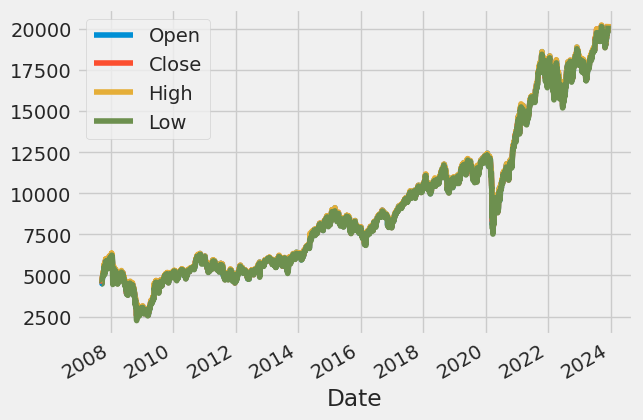

In [5]:
# Convert to DateTime
df['Date'] = pd.to_datetime(df['Date'])

# Set date as index
df.set_index('Date', inplace=True)

# Plot time series
df[['Open', 'Close', 'High', 'Low']].plot()


<Axes: xlabel='Date'>

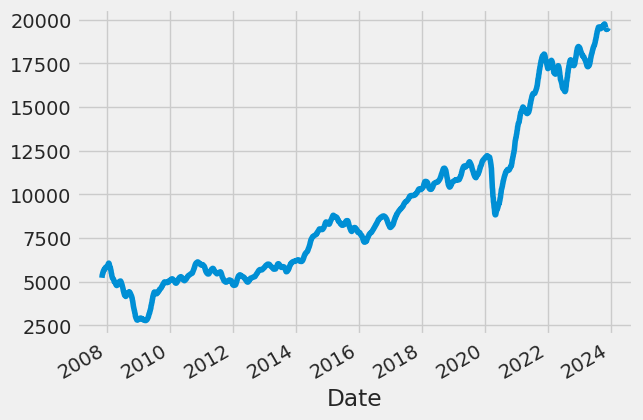

In [6]:
# Identify trends
df['Close'].rolling(window=30).mean().plot()  # 30-day moving average


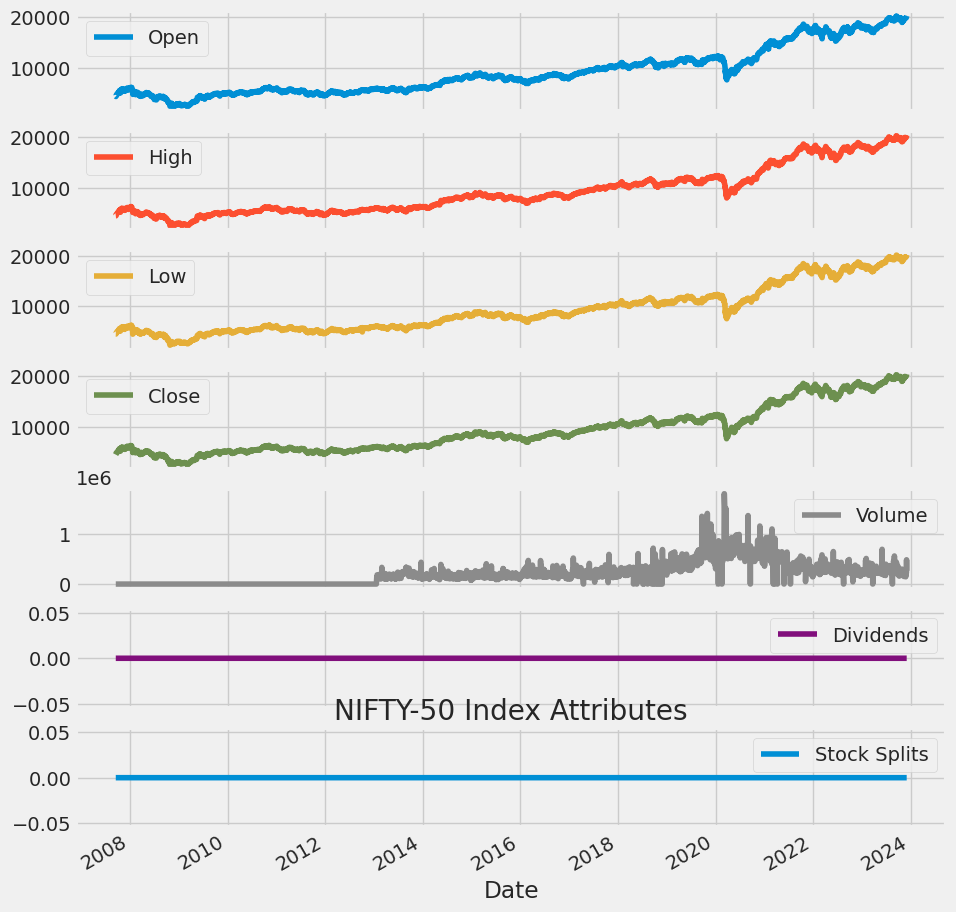

In [7]:
df.plot(subplots = True, figsize = (10,12))
plt.title('NIFTY-50 Index Attributes')
plt.show()

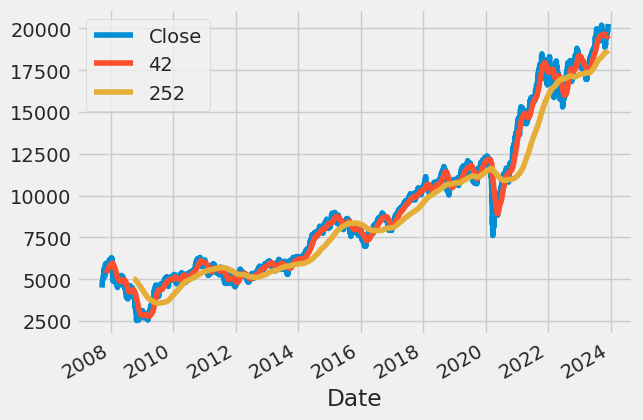

In [8]:
#Isolate the adjusted closing prices 
adj_close_px = df['Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]


# Short moving window rolling mean
df['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
df['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
df[['Close', '42', '252']].plot()

plt.show()


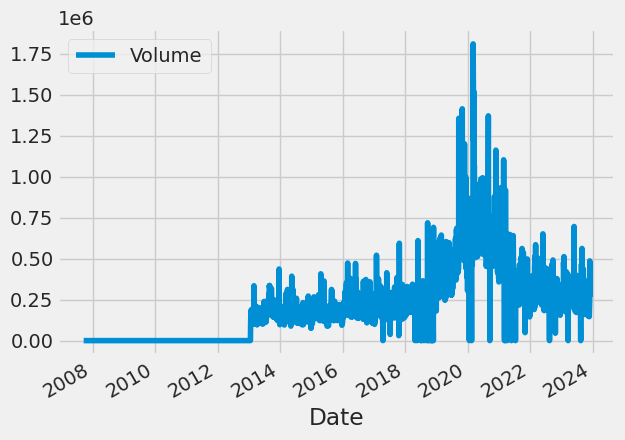

In [9]:
# Relationship between volume and price
df.plot(y='Volume', use_index=True)

# High volume days
high_volume_days = df[df['Volume'] > df['Volume'].quantile(0.95)]


In [10]:
# Example: Daily return percentage
df['daily_return'] = df['Close'].pct_change() * 100


<Axes: >

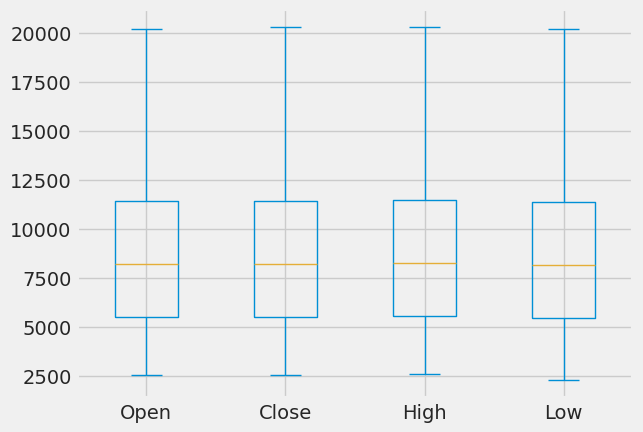

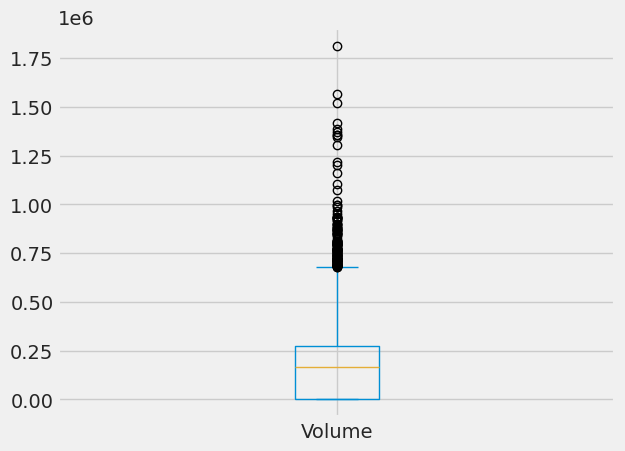

In [11]:
# Box plot
df[['Open', 'Close', 'High', 'Low']].plot(kind='box')

df[['Volume']].plot(kind='box')


Text(0.5, 1.0, 'Stock Prices Over Time')

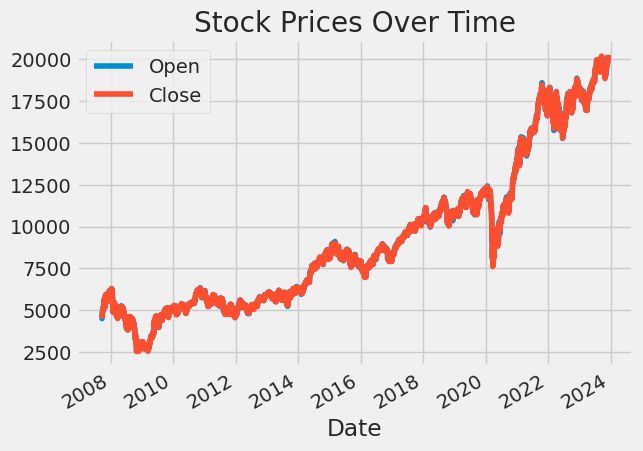

In [12]:
import matplotlib.pyplot as plt

# Time series plot
df[['Open', 'Close']].plot()
plt.title('Stock Prices Over Time')


<Axes: xlabel='Open', ylabel='Close'>

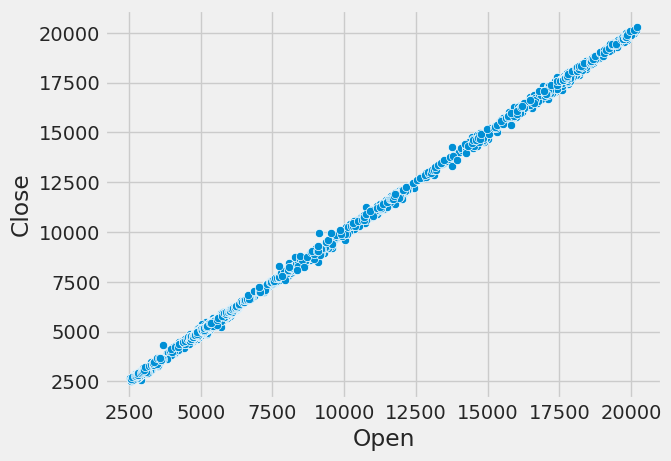

In [13]:

# Scatter plot for correlation
sns.scatterplot(data=df, x='Open', y='Close')



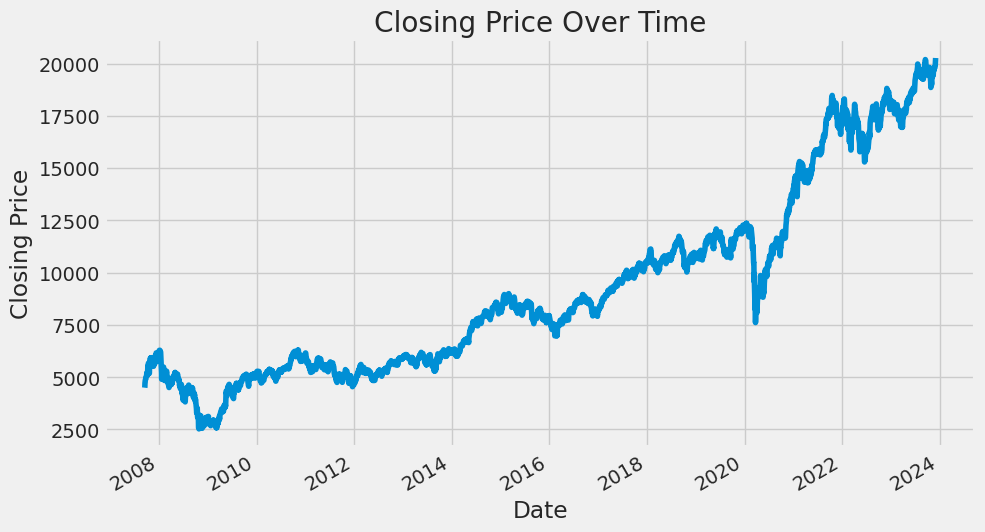

In [14]:
import matplotlib.pyplot as plt

# Converting date to datetime and setting it as index
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)

# Plotting closing prices
df['Close'].plot(figsize=(10, 6))
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


<Axes: xlabel='Date'>

<Figure size 4000x4500 with 0 Axes>

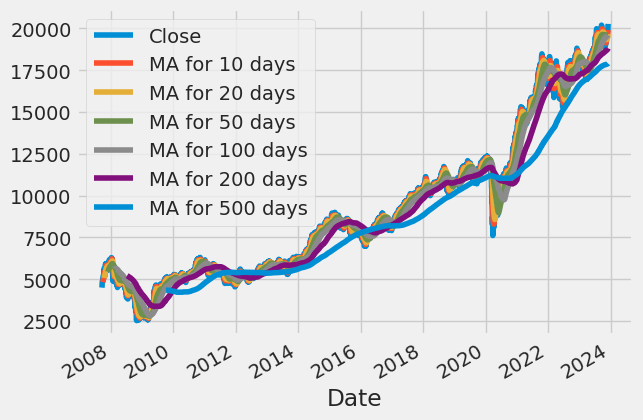

In [15]:
ma_day = [10, 20, 50, 100, 200, 500]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Close'].rolling(ma).mean()
        

fig = plt. figure(figsize=(40,45))
df[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days', 'MA for 500 days']].plot()


<Axes: xlabel='Date'>

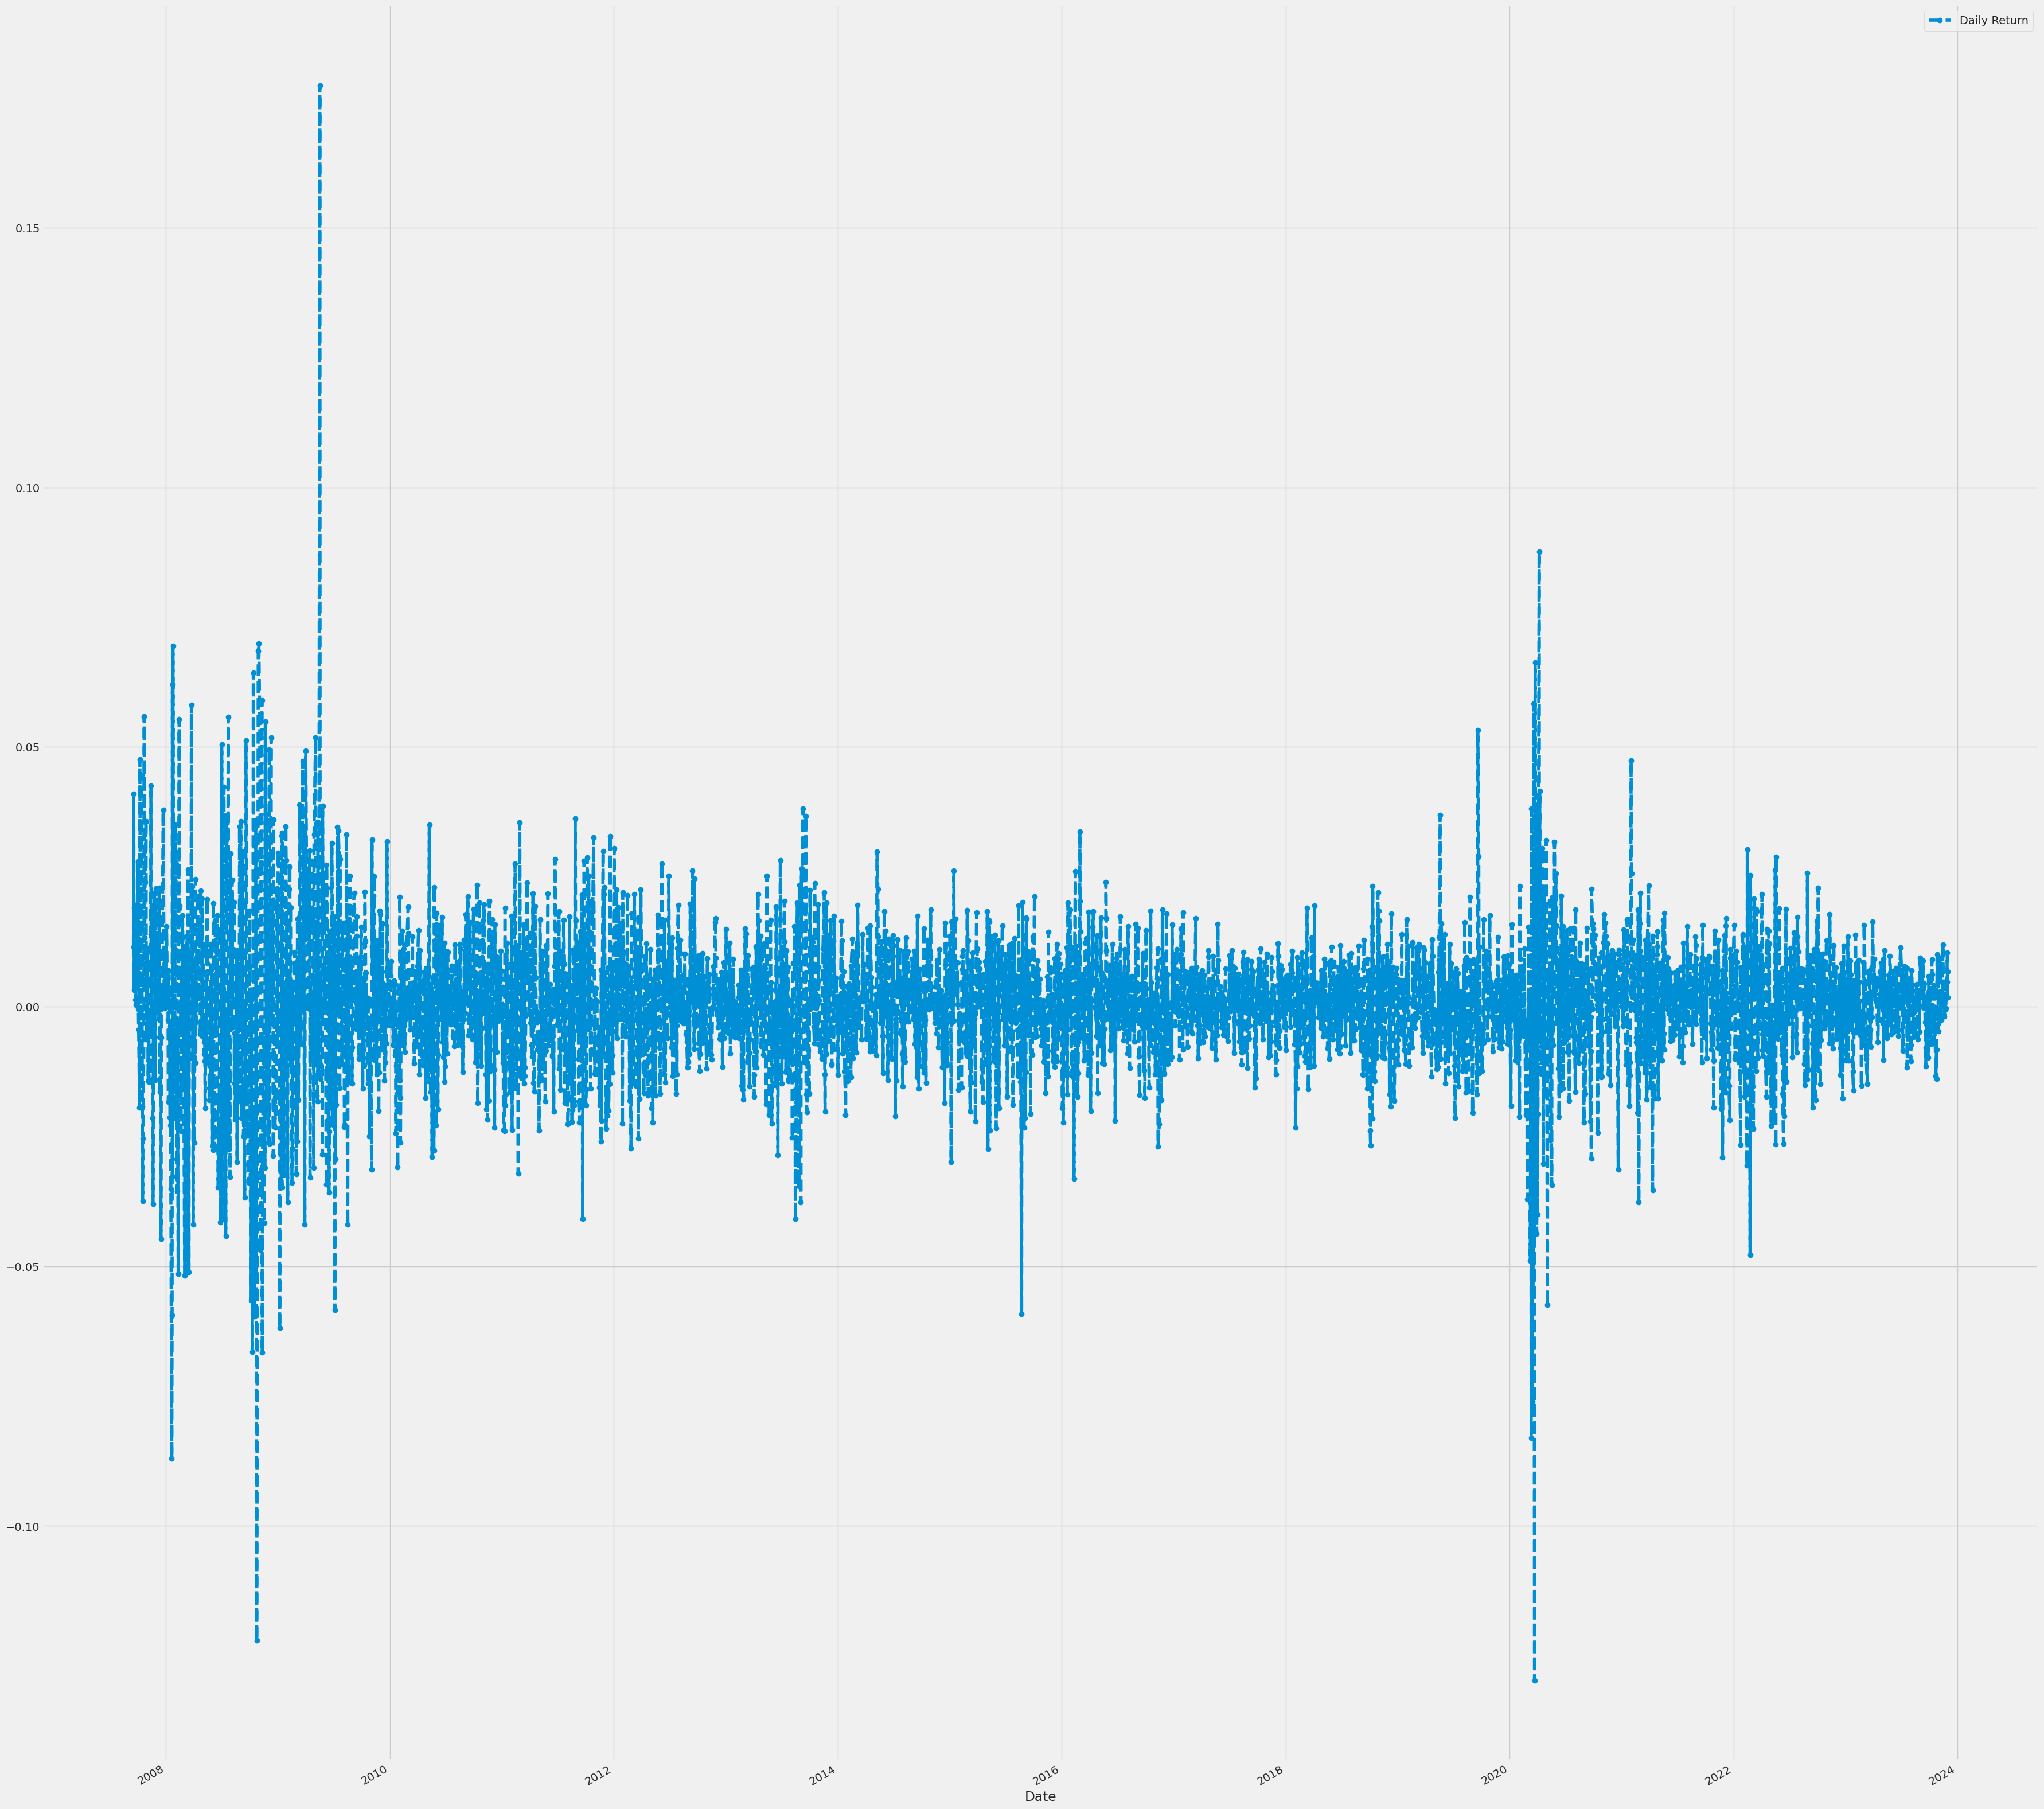

In [16]:
df['Daily Return'] = df['Close'].pct_change()
fig = plt. figure(figsize=(40,45))
df['Daily Return'].plot(legend=True, linestyle='--', marker='o')

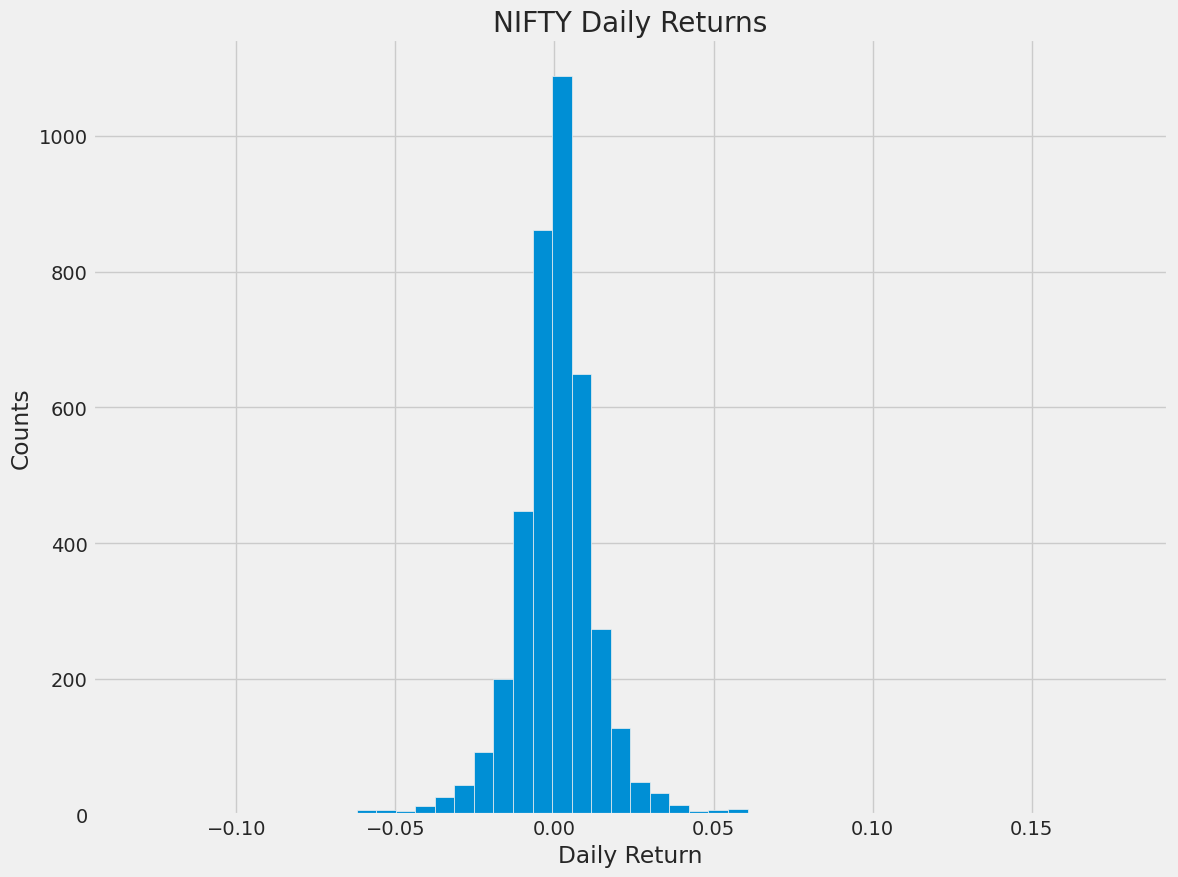

In [17]:
plt.figure(figsize=(12, 9))

df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title(f'NIFTY Daily Returns')
    
plt.tight_layout()

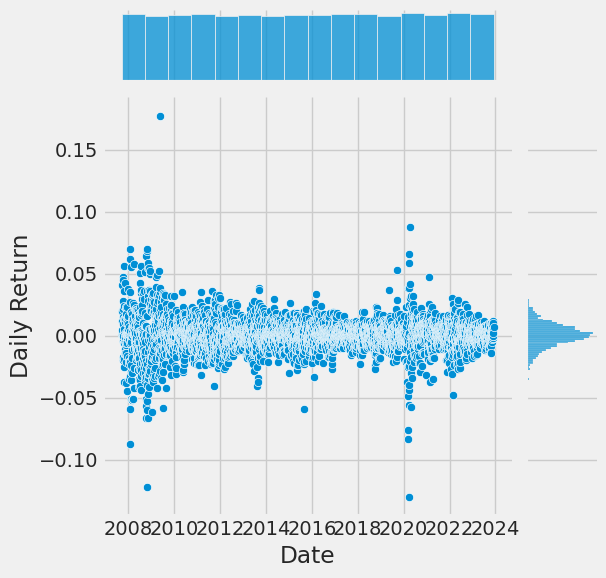

In [18]:
sns.jointplot(y='Daily Return', x='Date', data=df, kind='scatter')

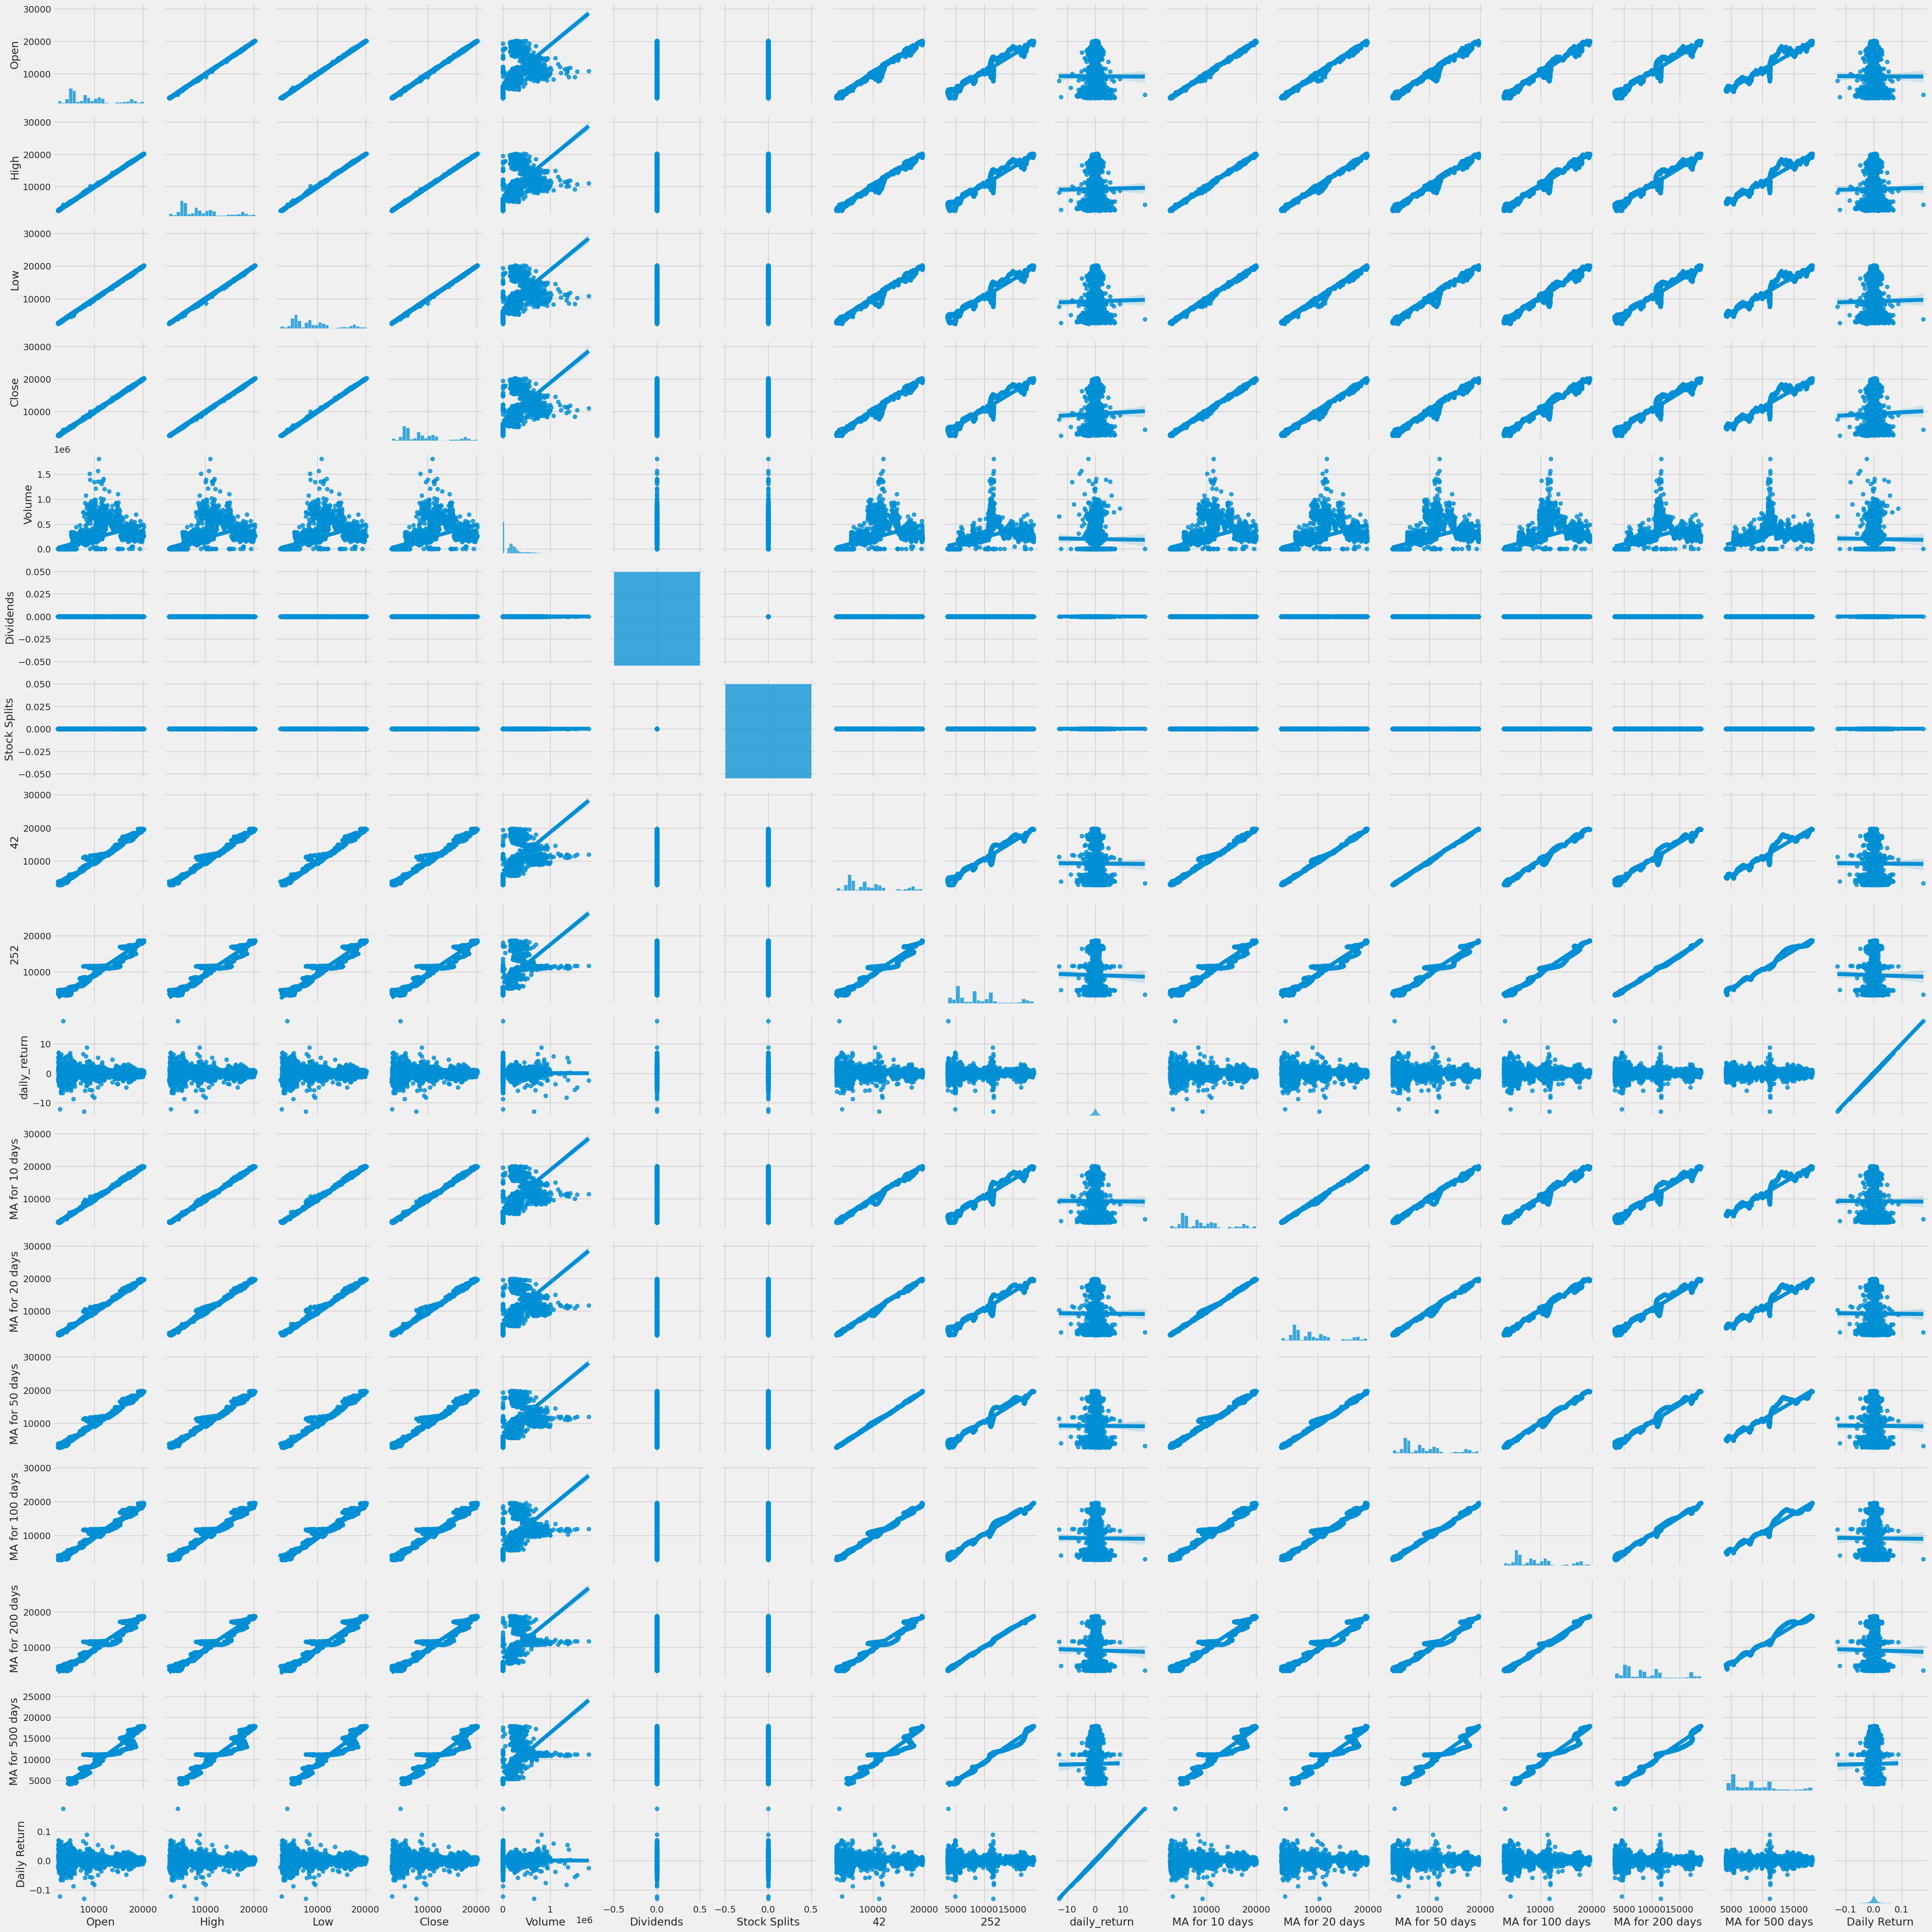

In [19]:
sns.pairplot(df, kind='reg')

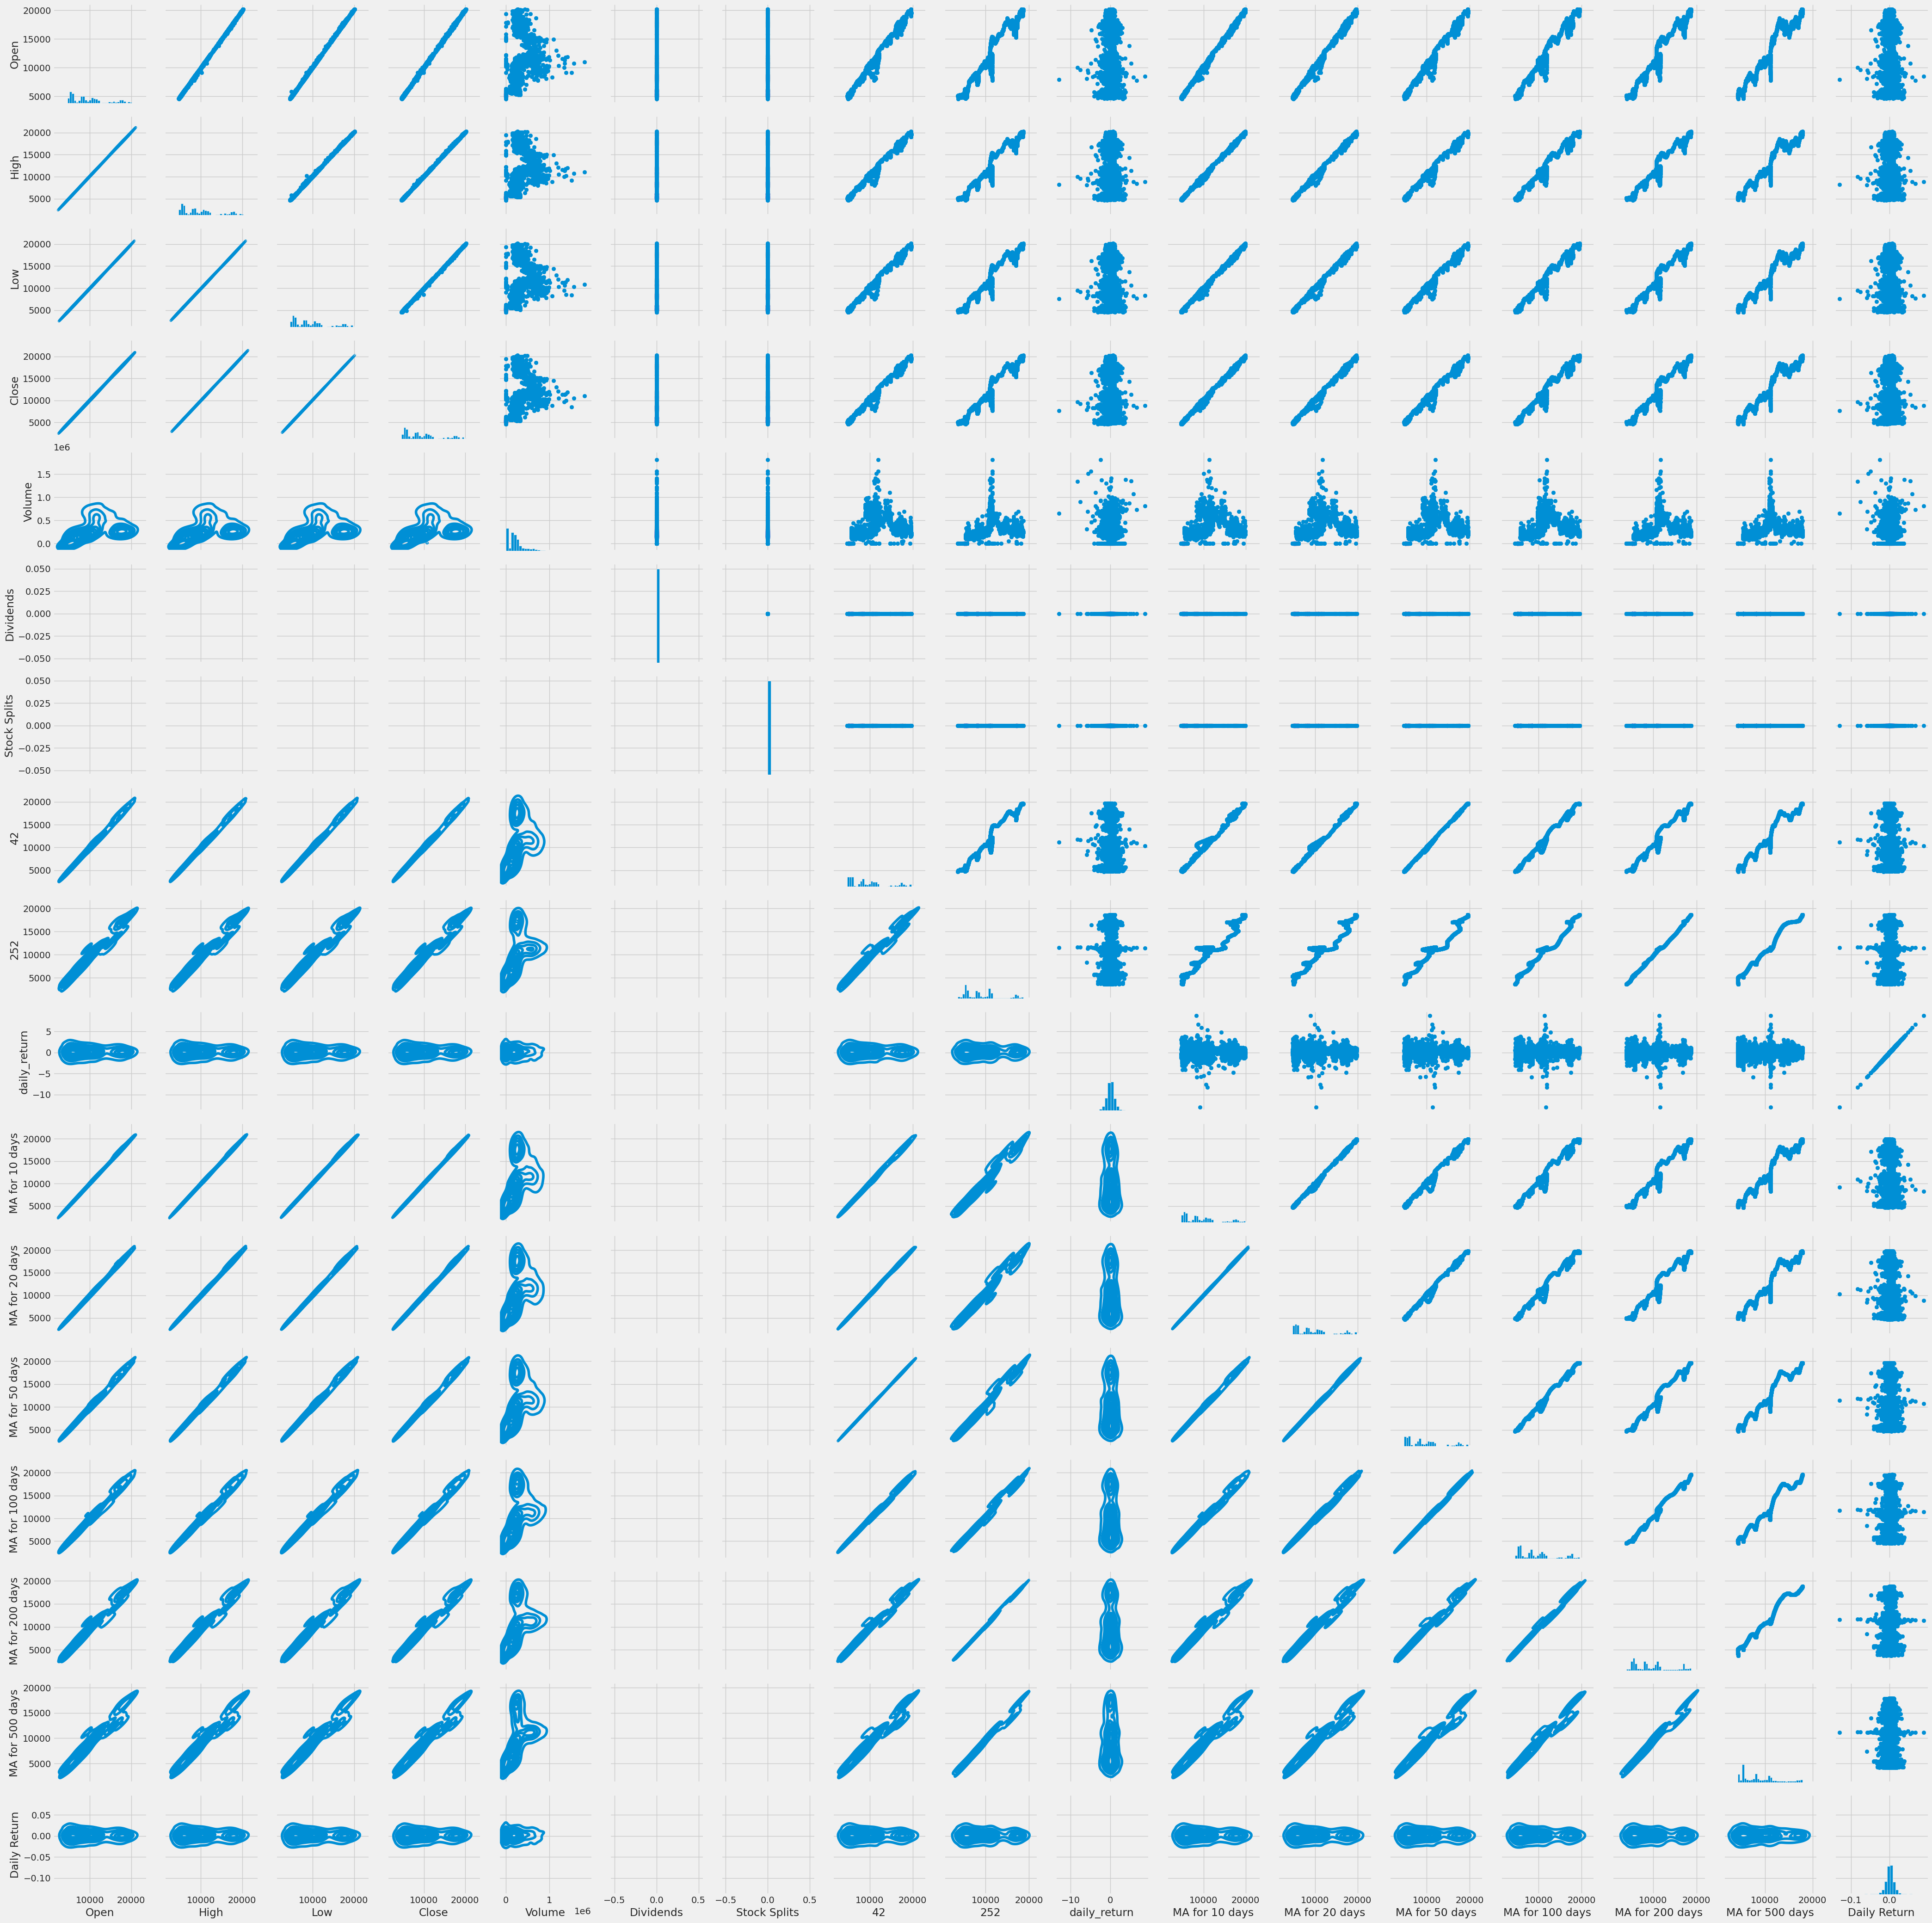

In [20]:
return_fig = sns.PairGrid(df.dropna())
return_fig.map_upper(plt.scatter)#, color='Pastel')
return_fig.map_lower(sns.kdeplot)#, cmap='Spectral')
return_fig.map_diag(plt.hist, bins=30)

<Axes: >

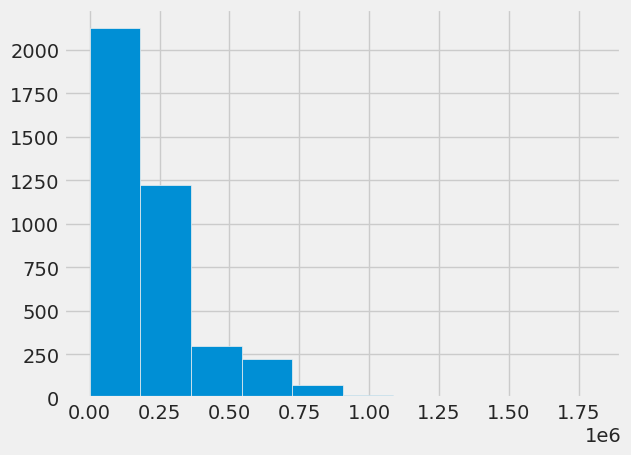

In [21]:
# Histogram
df['Volume'].hist()


In [22]:
!pip install lazypredict
import lazypredict

  Obtaining dependency information for lazypredict from https://files.pythonhosted.org/packages/bb/df/936639581c018ac59b1096d34e42d39e967d97bf09b1fdb1645e64852e36/lazypredict-0.2.12-py2.py3-none-any.whl.metadata


In [23]:

# Load the dataset
df = pd.read_csv('../input/national-stock-exchange-nifty-50-index-values/NIFTY50_stock_history.csv')

# Inspect the first few rows
print(df.head())


                        Date         Open         High          Low  \
0  2007-09-17 00:00:00+05:30  4518.450195  4549.049805  4482.850098   
1  2007-09-18 00:00:00+05:30  4494.100098  4551.799805  4481.549805   
2  2007-09-19 00:00:00+05:30  4550.250000  4739.000000  4550.250000   
3  2007-09-20 00:00:00+05:30  4734.850098  4760.850098  4721.149902   
4  2007-09-21 00:00:00+05:30  4752.950195  4855.700195  4733.700195   

         Close  Volume  Dividends  Stock Splits  
0  4494.649902       0        0.0           0.0  
1  4546.200195       0        0.0           0.0  
2  4732.350098       0        0.0           0.0  
3  4747.549805       0        0.0           0.0  
4  4837.549805       0        0.0           0.0  


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting features and target
X = df.drop(['Close', 'Date'], axis=1)  # Assuming 'date' and 'close' are in the dataframe
y = df['Close']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
from lazypredict.Supervised import LazyRegressor

# Initialize LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Displaying results
#print(models)
models.head(50)


100%|██████████| 42/42 [00:22<00:00,  1.85it/s]


Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
BayesianRidge                                1.00       1.00   31.45   
RANSACRegressor                              1.00       1.00   31.46   
OrthogonalMatchingPursuitCV                  1.00       1.00   31.46   
LassoLarsIC                                  1.00       1.00   31.46   
Lars                                         1.00       1.00   31.46   
LinearRegression                             1.00       1.00   31.46   
LassoLarsCV                                  1.00       1.00   31.46   
TransformedTargetRegressor                   1.00       1.00   31.46   
HuberRegressor                               1.00       1.00   31.56   
RidgeCV                                      1.00       1.00   33.33   
LarsCV                                       1.00       1.00   42.22   
LassoLars                                    1.00       1.00   42.23   
ExtraTreesRegressor                          1.00       1.00   43.78   
RandomForestRegressor                        1.00       1.00   45.10   
Ridge                                        1.00       1.00   46.39   
BaggingRegressor                             1.00       1.00   47.06   
PassiveAggressiveRegressor                   1.00       1.00   52.68   
OrthogonalMatchingPursuit                    1.00       1.00   53.06   
SGDRegressor                                 1.00       1.00   53.66   
XGBRegressor                                 1.00       1.00   58.52   
LGBMRegressor                                1.00       1.00   58.75   
GradientBoostingRegressor                    1.00       1.00   60.95   
HistGradientBoostingRegressor                1.00       1.00   61.94   
DecisionTreeRegressor                        1.00       1.00   62.03   
ExtraTreeRegressor                           1.00       1.00   65.68   
Lasso                                        1.00       1.00   71.53   
LassoCV                                      1.00       1.00   71.58   
KNeighborsRegressor                          1.00       1.00   92.02   
AdaBoostRegressor                            1.00       1.00  291.20   
ElasticNet                                   0.98       0.98  643.37   
PoissonRegressor                             0.97       0.97  735.66   
TweedieRegressor                             0.94       0.94 1091.73   
GammaRegressor                               0.93       0.93 1186.29   
GaussianProcessRegressor                     0.78       0.79 2074.44   
ElasticNetCV                                 0.66       0.66 2606.46   
SVR                                          0.23       0.24 3918.81   
NuSVR                                        0.17       0.18 4060.68   
DummyRegressor                              -0.01      -0.00 4491.63   
MLPRegressor                                -1.52      -1.50 7090.02   
LinearSVR                                   -1.63      -1.61 7237.23   
KernelRidge                                 -3.34      -3.30 9295.89   

                               Time Taken  
Model                                      
BayesianRidge                        0.09  
RANSACRegressor                      0.09  
OrthogonalMatchingPursuitCV          0.09  
LassoLarsIC                          0.06  
Lars                                 0.06  
LinearRegression                     0.06  
LassoLarsCV                          0.11  
TransformedTargetRegressor           0.02  
HuberRegressor                       0.24  
RidgeCV                              0.08  
LarsCV                               0.10  
LassoLars                            0.06  
ExtraTreesRegressor                  0.68  
RandomForestRegressor                1.25  
Ridge                                0.02  
BaggingRegressor                     0.14  
PassiveAggressiveRegressor           0.06  
OrthogonalMatchingPursuit            0.02  
SGDRegressor                         0.08  
XGBRegress